# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
fraud_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

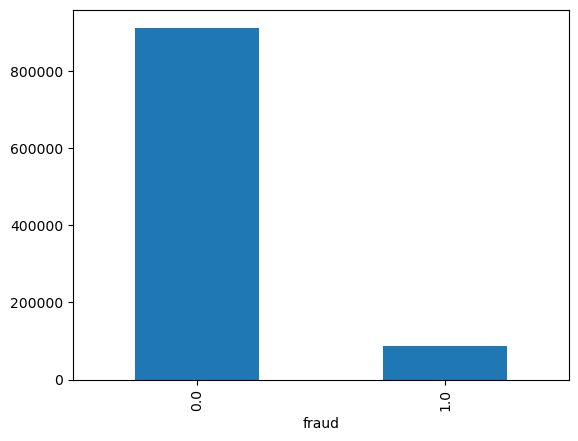

In [3]:
#1 classifier with an umbalance target
fraud_df1 = fraud_df["fraud"].value_counts()
fraud_df1.plot(kind="bar")
plt.show()

In [5]:
#2 train a logistic regression
target = fraud_df["fraud"]
features = fraud_df.drop(columns = ["fraud"])


X_train, X_test, y_train, y_test = train_test_split(features, target)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
log_reg = LogisticRegression()

In [8]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test_scaled, y_test)

0.958328

In [10]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228001
         1.0       0.89      0.60      0.72     21999

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [11]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [12]:
train["fraud"] = y_train.values

In [13]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.387752,-0.157644,-0.493357,-2.727037,-0.733780,-0.334576,0.733720,0.0
1,-0.336946,-0.182112,-0.344189,0.366698,-0.733780,-0.334576,0.733720,0.0
2,-0.391129,-0.003298,0.123677,-2.727037,-0.733780,-0.334576,-1.362918,0.0
3,1.393940,-0.174882,-0.265405,0.366698,-0.733780,2.988854,0.733720,0.0
4,-0.158554,-0.060809,-0.545098,0.366698,-0.733780,-0.334576,-1.362918,0.0
...,...,...,...,...,...,...,...,...
749995,0.722049,-0.185729,-0.591219,0.366698,-0.733780,-0.334576,-1.362918,0.0
749996,-0.388972,0.795540,1.674822,-2.727037,1.362806,2.988854,-1.362918,0.0
749997,-0.119619,0.065778,-0.441431,0.366698,1.362806,-0.334576,0.733720,0.0
749998,-0.231126,-0.047339,-0.387377,0.366698,-0.733780,-0.334576,0.733720,0.0


In [14]:

fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [15]:
yes_fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [16]:
fraud_over = pd.concat([yes_fraud_oversampled, no_fraud])
fraud_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31267,-0.142257,-0.120339,2.212187,0.366698,-0.733780,-0.334576,0.733720,1.0
497865,-0.231245,-0.183285,2.041183,0.366698,1.362806,-0.334576,0.733720,1.0
486788,-0.136357,-0.052019,0.799811,0.366698,-0.733780,-0.334576,0.733720,1.0
599113,2.918996,-0.166800,-0.521302,0.366698,-0.733780,-0.334576,0.733720,1.0
524682,0.196096,-0.125161,1.955226,0.366698,1.362806,-0.334576,0.733720,1.0
...,...,...,...,...,...,...,...,...
749995,0.722049,-0.185729,-0.591219,0.366698,-0.733780,-0.334576,-1.362918,0.0
749996,-0.388972,0.795540,1.674822,-2.727037,1.362806,2.988854,-1.362918,0.0
749997,-0.119619,0.065778,-0.441431,0.366698,1.362806,-0.334576,0.733720,0.0
749998,-0.231126,-0.047339,-0.387377,0.366698,-0.733780,-0.334576,0.733720,0.0


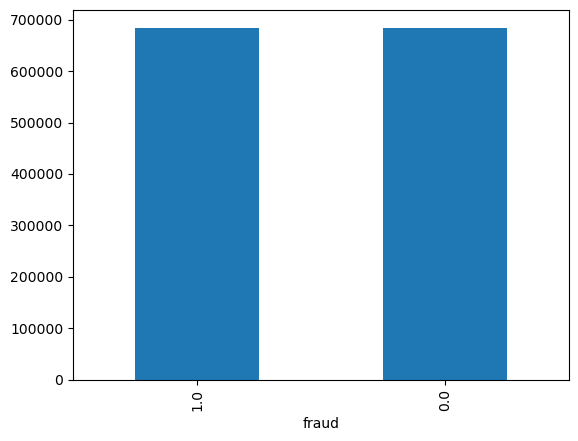

In [17]:
fraud_plt = fraud_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [18]:
X_train_over = fraud_over.drop(columns = ["fraud"])
y_train_over = fraud_over["fraud"]

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [20]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228001
         1.0       0.58      0.95      0.72     21999

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [21]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False,
                                    n_samples = len(fraud), 
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
448144,0.076106,-0.185811,-0.210923,0.366698,-0.733780,-0.334576,-1.362918,0.0
39639,0.574601,-0.188048,0.271134,0.366698,-0.733780,-0.334576,0.733720,0.0
95088,-0.118503,-0.187315,-0.477610,0.366698,1.362806,-0.334576,-1.362918,0.0
414555,1.823591,-0.178319,-0.276073,0.366698,1.362806,-0.334576,-1.362918,0.0
422759,-0.011142,-0.188603,-0.576950,0.366698,-0.733780,-0.334576,0.733720,0.0
...,...,...,...,...,...,...,...,...
6279,-0.304667,-0.167093,0.109102,0.366698,-0.733780,-0.334576,0.733720,0.0
602619,-0.337087,-0.096948,-0.415894,0.366698,1.362806,-0.334576,0.733720,0.0
537888,0.833634,-0.182995,-0.643543,0.366698,-0.733780,-0.334576,-1.362918,0.0
181253,-0.349958,-0.184472,7.900497,0.366698,-0.733780,-0.334576,-1.362918,0.0


In [22]:
fraud_over1 = pd.concat([no_fraud_undersampled, no_fraud])
fraud_over1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
448144,0.076106,-0.185811,-0.210923,0.366698,-0.733780,-0.334576,-1.362918,0.0
39639,0.574601,-0.188048,0.271134,0.366698,-0.733780,-0.334576,0.733720,0.0
95088,-0.118503,-0.187315,-0.477610,0.366698,1.362806,-0.334576,-1.362918,0.0
414555,1.823591,-0.178319,-0.276073,0.366698,1.362806,-0.334576,-1.362918,0.0
422759,-0.011142,-0.188603,-0.576950,0.366698,-0.733780,-0.334576,0.733720,0.0
...,...,...,...,...,...,...,...,...
749995,0.722049,-0.185729,-0.591219,0.366698,-0.733780,-0.334576,-1.362918,0.0
749996,-0.388972,0.795540,1.674822,-2.727037,1.362806,2.988854,-1.362918,0.0
749997,-0.119619,0.065778,-0.441431,0.366698,1.362806,-0.334576,0.733720,0.0
749998,-0.231126,-0.047339,-0.387377,0.366698,-0.733780,-0.334576,0.733720,0.0


In [23]:
X_train_under = fraud_over1.drop(columns = ["fraud"])
y_train_under = fraud_over1["fraud"]

In [27]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_train_under, y_train_under)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
sm = SMOTE(random_state = 1, sampling_strategy=1.0)

In [30]:
y_train.value_counts()

fraud
0.0    684596
1.0     65404
Name: count, dtype: int64

In [31]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [32]:
y_train_sm.value_counts()

fraud
0.0    684596
1.0    684596
Name: count, dtype: int64

In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [34]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228001
         1.0       0.57      0.95      0.72     21999

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

